<a href="https://colab.research.google.com/github/iamatul1214/Pytorch/blob/main/Linear_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
## To check the GPU allocated
!nvidia-smi

Tue Mar  8 16:39:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [114]:
## We have got Tesla K80 GPU

## Let's create a sample dataset with 4 features and two labels.
### Features- Region, Temperature, Rainfall, humidity
### Label- Production of wheat, production of rice.
## Here we have two labels in same data so we will have two different equations for each label. 
### y1 (Prod. of wheat)=w11*temp + w12*rainfall + w13*humidity + bias1
### y2 (Prod. of Rice)=w21*temp + w22*rainfall + w23*humidity + bias2


In [115]:
import numpy as np
import torch
import matplotlib.pyplot as plt


In [116]:
## Let's create input data
input=np.array([[32,55,77],
                [82,15,37],
                [72,74,90],
                [34,56,90],
                [67,32,45],
                [91,90,45],], dtype='float32')        ## We can take float64 as well, but in order to save memory we are taking float32
input

array([[32., 55., 77.],
       [82., 15., 37.],
       [72., 74., 90.],
       [34., 56., 90.],
       [67., 32., 45.],
       [91., 90., 45.]], dtype=float32)

In [117]:
## Let's create the target data of label
target=np.array([[32,44],
                 [78,61],
                 [90,71],
                 [74,32],
                 [36,32],
                 [22,69]], dtype='float32')
target

array([[32., 44.],
       [78., 61.],
       [90., 71.],
       [74., 32.],
       [36., 32.],
       [22., 69.]], dtype=float32)

In [118]:
## Now we need to convert input and target to tensors because we are going to work with pytorch. Pytorch and Tensorflow required tensors only because they also work on GPU

input=torch.from_numpy(input)
target=torch.from_numpy(target)

print(input)
print(target)

tensor([[32., 55., 77.],
        [82., 15., 37.],
        [72., 74., 90.],
        [34., 56., 90.],
        [67., 32., 45.],
        [91., 90., 45.]])
tensor([[32., 44.],
        [78., 61.],
        [90., 71.],
        [74., 32.],
        [36., 32.],
        [22., 69.]])


In [119]:
## assigning random weights and biases initially
weights=torch.randn(2,3, requires_grad=True)     ## We need 3 weights for wheat and rice each
bias=torch.randn(2, requires_grad=True)          ## We only need two biases

print(weights)
print(bias)

tensor([[-1.1647, -0.7748,  1.1168],
        [ 0.3772,  1.1557, -0.4336]], requires_grad=True)
tensor([0.3817, 1.2857], requires_grad=True)


In [120]:
## Now let's create the matrix multiplication of our model
def model(input):
  return input @ weights.t() + bias       ## input @ weights.t()--> dot product of the input and transpose of weight matrix

In [121]:
prediction=model(input)
print(prediction)

tensor([[   6.4907,   43.5342],
        [ -65.4247,   33.5075],
        [ -40.3006,   74.9439],
        [  17.9050,   39.8075],
        [ -52.1914,   44.0287],
        [-125.0837,  120.1146]], grad_fn=<AddBackward0>)


In [122]:
from numpy.lib.function_base import diff
## Let's calculate Mean squared error
def MSE(t1,t2):
  difference=t1-t2
  return torch.sum(difference * difference)/ difference.numel()



In [123]:
loss= MSE(prediction, target)
print(loss)

tensor(6195.6309, grad_fn=<DivBackward0>)


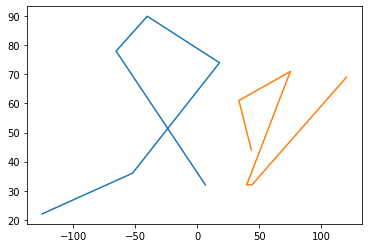

In [124]:
plt.plot(prediction.detach().numpy(), target.detach().numpy())
plt.show()

### We observed the loss value and also the graph and found that there are lot of differnces among both of the prediction and actual.

In [125]:
## Let's compute the gradient
loss.backward()

In [126]:
print("Weights and biases before any kind of training\n"+"**"* 30)

print(weights)
print(weights.grad)

print(bias)
print(bias.grad)

Weights and biases before any kind of training
************************************************************
tensor([[-1.1647, -0.7748,  1.1168],
        [ 0.3772,  1.1557, -0.4336]], requires_grad=True)
tensor([[-7193.2407, -5399.6011, -5772.3203],
        [  622.9124,   879.3813,   474.3301]])
tensor([0.3817, 1.2857], requires_grad=True)
tensor([-98.4341,   7.8227])


In [127]:
## Now let's try to change the value of weights and biases by multiplying it with some learning rate and using optimizer
with torch.no_grad():
  weights -= weights.grad * 1e-5
  bias -= bias.grad * 1e-5

In [128]:
print("Weights and biases After modifying them with multiplication with learning rate but not training\n"+"**"* 50)

print(weights)
print(weights.grad)

print(bias)
print(bias.grad)

Weights and biases After modifying them with multiplication with learning rate but not training
****************************************************************************************************
tensor([[-1.0928, -0.7208,  1.1745],
        [ 0.3710,  1.1470, -0.4383]], requires_grad=True)
tensor([[-7193.2407, -5399.6011, -5772.3203],
        [  622.9124,   879.3813,   474.3301]])
tensor([0.3827, 1.2857], requires_grad=True)
tensor([-98.4341,   7.8227])


## Now let's try to predict the output and check the loss with the modification of the weight what we did. Note that it was not training and just the modification of weights and biases once,.

In [129]:
prediction=model(input=input)

In [130]:
loss=MSE(prediction,target)
print(f"loss after checking with modfication of weights and biases= {loss}")

loss after checking with modfication of weights and biases= 5104.60400390625


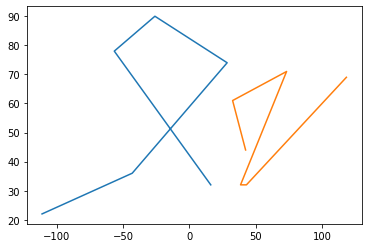

In [131]:
## Let's try to plot the loss now
plt.plot(prediction.detach().numpy(), target.detach().numpy())
plt.show()

### We can observe very minute difference now, but we need to train our model in number of epochs which is a hyperparameter to get better result and lesser loss value.

In [132]:
## Let's do training
n=5000
def training(weights,bias,epochs=100):
  for i in range(epochs):
    prediction=model(input)
    loss=MSE(prediction,target)
    loss.backward()

    ## Updating weights and biases
    with torch.no_grad():
      weights -= weights.grad * 1e-5   ## W(new)=W(old) - [(dx/dw)*learning rate]
      bias -= bias.grad * 1e-5

      weights.grad.zero_()
      bias.grad.zero_()
    if i % 10 == 0:
      print(f"Epochs: {i}/{epochs} -> Loss : {loss}")




In [133]:
## Let's try to plot the loss now
def prediction_vs_real_plot(prediction,target):
  plt.plot(prediction.detach().numpy(), target.detach().numpy())
  plt.legend(['Prediction','Actual'])
  plt.show()

In [134]:
## Let's create training with only 200 epochs
training(weights=weights,bias=bias,epochs=200)

Epochs: 0/200 -> Loss : 5104.60400390625
Epochs: 10/200 -> Loss : 1279.9730224609375
Epochs: 20/200 -> Loss : 929.87548828125
Epochs: 30/200 -> Loss : 808.6091918945312
Epochs: 40/200 -> Loss : 720.9723510742188
Epochs: 50/200 -> Loss : 647.5838623046875
Epochs: 60/200 -> Loss : 584.9868774414062
Epochs: 70/200 -> Loss : 531.4107055664062
Epochs: 80/200 -> Loss : 485.4646301269531
Epochs: 90/200 -> Loss : 445.98486328125
Epochs: 100/200 -> Loss : 411.9908142089844
Epochs: 110/200 -> Loss : 382.6553039550781
Epochs: 120/200 -> Loss : 357.2800598144531
Epochs: 130/200 -> Loss : 335.2754821777344
Epochs: 140/200 -> Loss : 316.1436767578125
Epochs: 150/200 -> Loss : 299.4634704589844
Epochs: 160/200 -> Loss : 284.8789367675781
Epochs: 170/200 -> Loss : 272.08856201171875
Epochs: 180/200 -> Loss : 260.83734130859375
Epochs: 190/200 -> Loss : 250.90887451171875


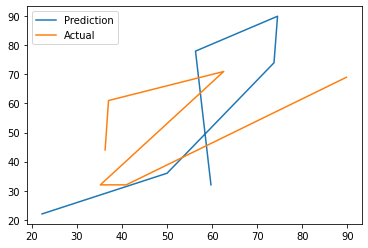

In [135]:
prediction=model(input)
prediction_vs_real_plot(prediction,target)

In [136]:
## Let's do training with 2000 epochs and check the graph
training(weights=weights, bias=bias, epochs=2000)

Epochs: 0/2000 -> Loss : 242.1193389892578
Epochs: 10/2000 -> Loss : 234.313232421875
Epochs: 20/2000 -> Loss : 227.35777282714844
Epochs: 30/2000 -> Loss : 221.14013671875
Epochs: 40/2000 -> Loss : 215.5642547607422
Epochs: 50/2000 -> Loss : 210.54786682128906
Epochs: 60/2000 -> Loss : 206.02105712890625
Epochs: 70/2000 -> Loss : 201.92356872558594
Epochs: 80/2000 -> Loss : 198.203857421875
Epochs: 90/2000 -> Loss : 194.8175811767578
Epochs: 100/2000 -> Loss : 191.72669982910156
Epochs: 110/2000 -> Loss : 188.89808654785156
Epochs: 120/2000 -> Loss : 186.3032989501953
Epochs: 130/2000 -> Loss : 183.91761779785156
Epochs: 140/2000 -> Loss : 181.719482421875
Epochs: 150/2000 -> Loss : 179.69020080566406
Epochs: 160/2000 -> Loss : 177.813232421875
Epochs: 170/2000 -> Loss : 176.07420349121094
Epochs: 180/2000 -> Loss : 174.46038818359375
Epochs: 190/2000 -> Loss : 172.96070861816406
Epochs: 200/2000 -> Loss : 171.56517028808594
Epochs: 210/2000 -> Loss : 170.2648162841797
Epochs: 220/200

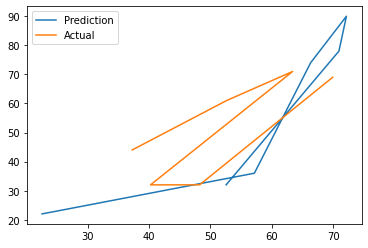

In [137]:
prediction=model(input)
prediction_vs_real_plot(prediction,target)

## Now Let's see the same thing with pytorch inbuilt functions

In [138]:
import torch.nn as nn   ## torch.nn means torch.neauralnetwork

In [139]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

#targets (Wheat and Rice)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)

In [140]:
inputs,targets

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 74.,  66.,  43.],
         [ 91.,  87.,  65.],
         [ 88., 134.,  59.],
         [101.,  44.,  37.],
         [ 68.,  96.,  71.],
         [ 73.,  66.,  44.],
         [ 92.,  87.,  64.],
         [ 87., 135.,  57.],
         [103.,  43.,  36.],
         [ 68.,  97.,  70.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 57.,  69.],
         [ 80., 102.],
         [118., 132.],
         [ 21.,  38.],
         [104., 118.],
         [ 57.,  69.],
         [ 82., 100.],
         [118., 134.],
         [ 20.,  38.],
         [102., 120.]]))

In [141]:
## Now let's load the data, since we would want data in batches that's why we pass the data into tensordataset so that it can make it tuple and we can easily interate
from torch.utils.data import TensorDataset, DataLoader
train_ds=TensorDataset(inputs, targets)

## Now we can see that we can easily perfrom slicing operation on this
train_ds[0:2]

(tensor([[73., 67., 43.],
         [91., 88., 64.]]), tensor([[ 56.,  70.],
         [ 81., 101.]]))

In [142]:
## Let's load the data with batch size defined
batch_size=3
train_data=DataLoader(train_ds,batch_size, shuffle=True)    ## Shuffling will take the random data, which will help the training to be robust.

In [143]:
for x,y in train_data:
  print(x,y)      ## We can see that now we have 5 batches with data being spread randomly

tensor([[103.,  43.,  36.],
        [ 69.,  96.,  70.],
        [101.,  44.,  37.]]) tensor([[ 20.,  38.],
        [103., 119.],
        [ 21.,  38.]])
tensor([[ 68.,  96.,  71.],
        [ 68.,  97.,  70.],
        [ 87., 135.,  57.]]) tensor([[104., 118.],
        [102., 120.],
        [118., 134.]])
tensor([[ 87., 134.,  58.],
        [ 88., 134.,  59.],
        [ 92.,  87.,  64.]]) tensor([[119., 133.],
        [118., 132.],
        [ 82., 100.]])
tensor([[102.,  43.,  37.],
        [ 91.,  87.,  65.],
        [ 91.,  88.,  64.]]) tensor([[ 22.,  37.],
        [ 80., 102.],
        [ 81., 101.]])
tensor([[73., 66., 44.],
        [73., 67., 43.],
        [74., 66., 43.]]) tensor([[57., 69.],
        [56., 70.],
        [57., 69.]])


In [144]:
## Let's define the model
model=nn.Linear(3,2)   # 3 is the feature and 2 label   ## This function will provide the weight and bias randomly automatically.
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.3783, -0.0638, -0.1526],
        [ 0.3372, -0.2469,  0.1030]], requires_grad=True)
Parameter containing:
tensor([ 0.1726, -0.5640], requires_grad=True)


In [145]:
model.parameters()    ## Since, it is a list so we either need to iterate or print as a list

<generator object Module.parameters at 0x7f443b2df2d0>

In [146]:

## Through iteration
for i in model.parameters():
  print(i)

Parameter containing:
tensor([[-0.3783, -0.0638, -0.1526],
        [ 0.3372, -0.2469,  0.1030]], requires_grad=True)
Parameter containing:
tensor([ 0.1726, -0.5640], requires_grad=True)


In [147]:
## Through list
list(model.parameters())

[Parameter containing:
 tensor([[-0.3783, -0.0638, -0.1526],
         [ 0.3372, -0.2469,  0.1030]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1726, -0.5640], requires_grad=True)]

In [148]:
## Let's check prediction using entire dataset
prediction=model(inputs)
prediction

tensor([[-38.2822,  11.9348],
        [-49.6363,  14.9817],
        [-50.1436,   1.6569],
        [-46.8066,  27.0202],
        [-42.7391,   6.2069],
        [-38.5967,  12.5188],
        [-49.7251,  15.3316],
        [-50.6745,   2.0970],
        [-46.4921,  26.4361],
        [-42.5133,   5.9728],
        [-38.3709,  12.2847],
        [-49.9508,  15.5657],
        [-50.0548,   1.3069],
        [-47.0323,  27.2544],
        [-42.4245,   5.6229]], grad_fn=<AddmmBackward0>)

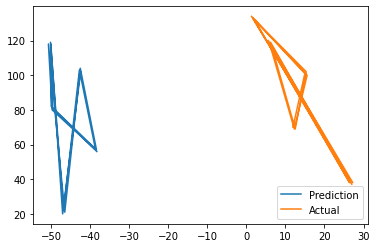

In [149]:
## Let's observe this using plot
prediction_vs_real_plot(prediction, targets)

In [150]:
## Let's check the loss 
import torch.nn.functional as f
loss_function=f.mse_loss

In [151]:
loss= loss_function(prediction,targets)
loss

tensor(12111.1299, grad_fn=<MseLossBackward0>)

In [152]:
## Let's define optimizers
opt= torch.optim.SGD(model.parameters(), lr=1e-5)    ## Passing model parameters( weights and biases) for gradient 


In [153]:
## Let's define training method now

def fit(epochs,model, optimizer,loss_fn,train_data):
  for epoch in range(epochs):
    for x,y in train_data:
      prediction=model(x)
      loss=loss_fn(prediction,y)
      loss.backward()
      optimizer.step()    ## This will calculate the gradient and update the weights
      optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
      print(f" Epochs {epoch+1}/{epochs}, Loss : {loss}")
  

In [154]:
fit(100,model, opt, loss_function, train_data)

 Epochs 10/100, Loss : 122.2193832397461
 Epochs 20/100, Loss : 229.3536834716797
 Epochs 30/100, Loss : 159.26644897460938
 Epochs 40/100, Loss : 37.3142204284668
 Epochs 50/100, Loss : 35.51171112060547
 Epochs 60/100, Loss : 29.086851119995117
 Epochs 70/100, Loss : 3.222041368484497
 Epochs 80/100, Loss : 18.44583511352539
 Epochs 90/100, Loss : 8.524593353271484
 Epochs 100/100, Loss : 9.87745189666748


In [155]:
prediction=model(inputs)

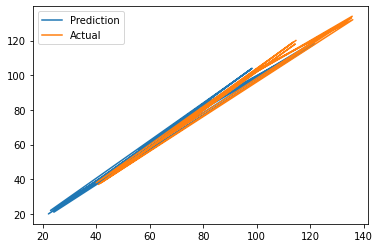

In [156]:
## Let's plot
prediction_vs_real_plot(prediction,targets)

##### we can see that we have almost got the close prediction

In [158]:
## Now let's predict
model(torch.tensor([[10,11,12.]]))

tensor([[12.4289, 14.6324]], grad_fn=<AddmmBackward0>)

In [159]:
## Saving the model
torch.save(model.state_dict(), 'Simple_LR_pytorch_model.pth')

In [160]:
model=torch.load('Simple_LR_pytorch_model.pth')